<a href="https://colab.research.google.com/github/abeer-fatima-dev/Stock-price-prediction/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0012
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.6028e-05
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.9806e-05
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.5796e-05
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 2.8112e-05
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.2566e-05
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.4830e-05
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 2.7747e-05
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.5183e-05
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.2880e-05
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


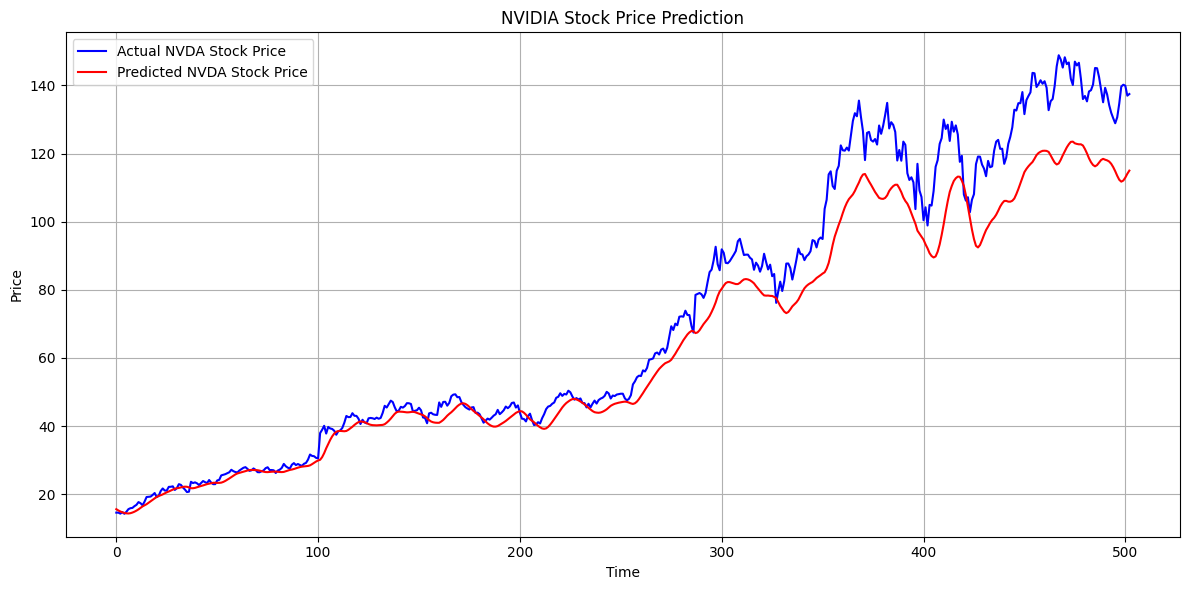

Root Mean Squared Error: 11.5093

Conclusion:
This LSTM model provides a basic stock price trend prediction for NVIDIA (NVDA).
To improve accuracy, you could experiment with more epochs, additional layers,
or include more input features like volume, open, high, and low prices.



In [1]:

# Stock Price Prediction using LSTM (CodeAlpha Internship)
# Author: Abeer Fatima
# Date: 24th May 2025

# 📌 Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 📊 Step 1: Download custom stock data (NVIDIA: NVDA)
df = yf.download('NVDA', start='2015-01-01', end='2024-12-31')
df = df[['Close']]

# 🔍 Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df.values)

# 🧠 Step 3: Create training and test datasets
train_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_len]
test_data = scaled_data[train_len - 60:]

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 🧱 Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 🏋️ Step 5: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# 🔮 Step 6: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📈 Step 7: Plotting the results
plt.figure(figsize=(12,6))
plt.plot(real_prices, color='blue', label='Actual NVDA Stock Price')
plt.plot(predictions, color='red', label='Predicted NVDA Stock Price')
plt.title('NVIDIA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Step 8: Evaluation
rmse = np.sqrt(mean_squared_error(real_prices, predictions))
print(f'Root Mean Squared Error: {rmse:.4f}')

# 📌 Step 9: Conclusion
print("""\nConclusion:
This LSTM model provides a basic stock price trend prediction for NVIDIA (NVDA).
To improve accuracy, you could experiment with more epochs, additional layers,
or include more input features like volume, open, high, and low prices.
""")
